In [9]:
%matplotlib inline
import pandas as pd

In [10]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [11]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Somewhere in the NYC,2017
1,Des hommes et des dieux,2010
2,Beau Jest,2008
3,Girl of the Sea,1920
4,The Fruit Machine,1988


In [12]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

In [13]:
decade = titles


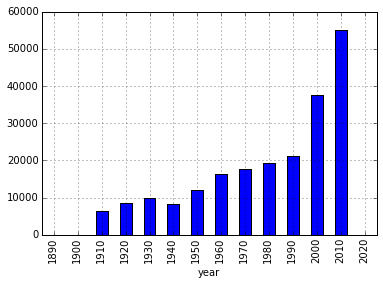

In [14]:
decade.groupby(decade.year // 10 * 10).size().plot(ylim = 0, kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

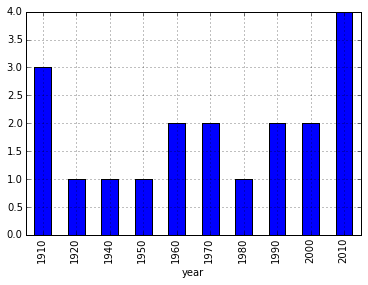

In [21]:
decade = decade[decade.title == 'Hamlet']
decade.groupby(decade.year // 10 * 10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [30]:
n1 = cast[(cast.year // 10 * 10 == 1950) & (cast.n == 1)]

In [34]:
n1.groupby(['year', 'type']).size()


year  type   
1950  actor      604
      actress    268
1951  actor      632
      actress    272
1952  actor      589
      actress    285
1953  actor      632
      actress    289
1954  actor      623
      actress    297
1955  actor      606
      actress    264
1956  actor      608
      actress    288
1957  actor      706
      actress    283
1958  actor      691
      actress    275
1959  actor      676
      actress    285
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [88]:
n15 = cast[cast.n < 6]
n15.groupby(['n', 'type'])

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [89]:
pink = cast[cast.title.str.startswith('The Pink Panther')]
pink.groupby(['title']).size()
#pink.head()

title
The Pink Panther                  108
The Pink Panther 2                 82
The Pink Panther Strikes Again     73
dtype: int64

In [98]:
pink1 = cast[cast.title == 'The Pink Panther']
pink1.sort('n').groupby(['year'])['n'].max()

year
1963    15
2006    50
Name: n, dtype: float64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [127]:
oz = cast[cast.name == 'Frank Oz']

In [130]:
ozg = oz.groupby(['year', 'title']).size()

In [132]:
ozg[ozg>1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [133]:
twice = cast[cast.name == 'Frank Oz']

In [139]:
twc = twice.groupby(['name', 'character']).size()

In [141]:
twc[twc>1].order()

name      character     
Frank Oz  Grover            2
          Bert              3
          Cookie Monster    3
          Fozzie Bear       4
          Sam the Eagle     5
          Yoda              5
          Animal            6
          Miss Piggy        6
dtype: int64